In [1]:
import stumpy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
data = pd.read_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_1.csv')

In [30]:
m = 200
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['arm_angle'] = sp.stump(data['arm_angle'], m)
motif_distance = np.round(mps['arm_angle'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in arm_angle is {motif_distance}")
motifs_idx['arm_angle'] = np.argsort(mps['arm_angle'][:, 0])[:2]

The motif pair matrix profile value in arm_angle is 1.4


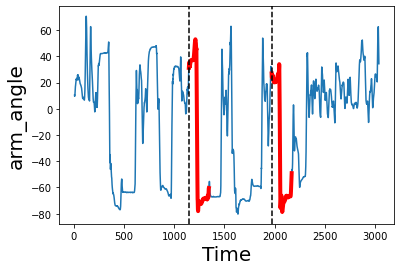

In [31]:
fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0})

axs.set_ylabel('arm_angle', fontsize='20')
axs.plot(data['arm_angle'])
axs.set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['arm_angle']:
    axs.plot(data['arm_angle'].iloc[idx:idx+m], c='red', linewidth=4)
    axs.axvline(x=idx, linestyle="dashed", c='black')

In [38]:
m = 200
mps = {}  # Store the 1-dimensional matrix profiles
discord_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['arm_angle'] = sp.stump(data['arm_angle'], m)
discord_distance = np.round(mps['arm_angle'][11:, 0].max(), 1)
print(f"The discord pair matrix profile value in arm_angle is {discord_distance}")
discord_idx['arm_angle'] = np.argsort(mps['arm_angle'][11:, 1])[:2]

The discord pair matrix profile value in arm_angle is 14.7


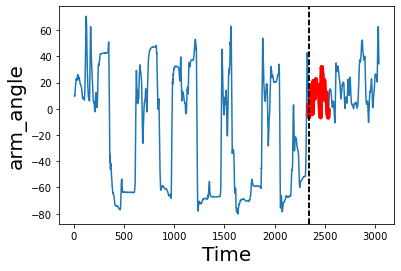

In [39]:
fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0})

axs.set_ylabel('arm_angle', fontsize='20')
axs.plot(data['arm_angle'])
axs.set_xlabel('Time', fontsize ='20')
for idx in discord_idx['arm_angle']:
    axs.plot(data['arm_angle'].iloc[idx:idx+m], c='red', linewidth=4)
    axs.axvline(x=idx, linestyle="dashed", c='black')

In [53]:
matrix_profile = []
for i in range(len(mps['arm_angle'])):
    matrix_profile.append(mps['arm_angle'][i][0])

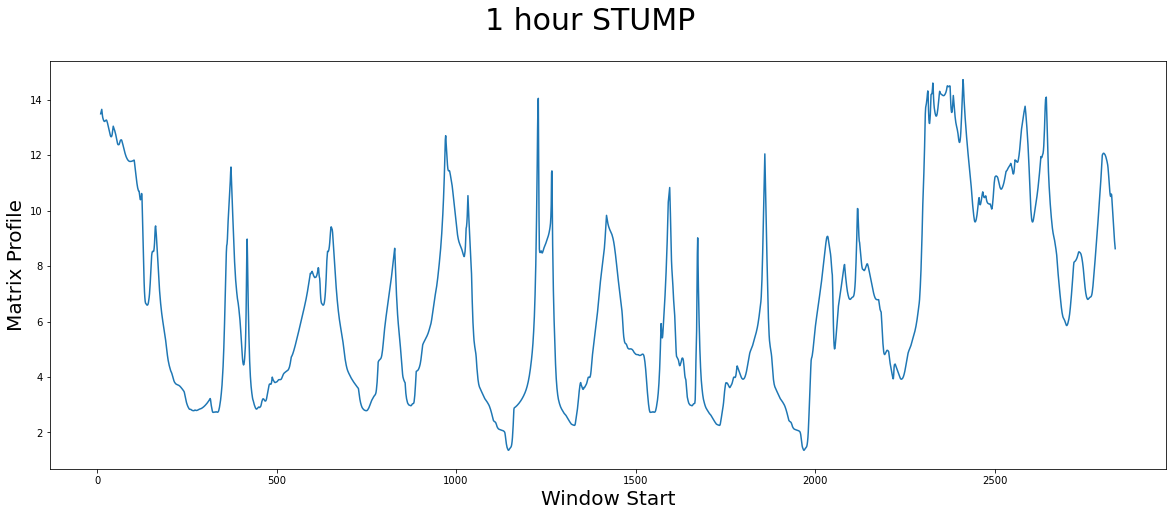

In [54]:
plt.figure(figsize=(20, 7.5))
plt.suptitle('1 hour STUMP', fontsize='30')
plt.xlabel('Window Start', fontsize ='20')
plt.ylabel('Matrix Profile', fontsize='20')
plt.plot(matrix_profile)

In [57]:
time_dict ={
  "5 min": 80,
  "10 min": 100,
  "15 min": 160,
  "1 hr": 200,
    "2 hr": 500,    
}

time_df = pd.DataFrame.from_dict(time_dict, orient='index', columns=['m'])
time_df = time_df.reset_index()

<Figure size 1440x720 with 0 Axes>

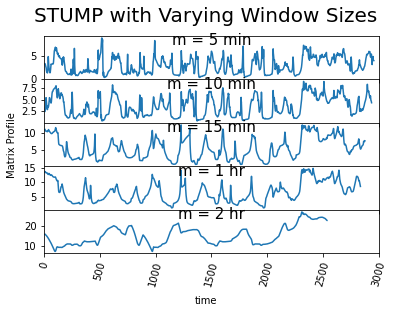

In [58]:
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.05, 'time', ha='center', fontsize='10')
fig.text(0.04, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='10')
for i, varying_m in enumerate(time_df['m'].values):
    mp = sp.stump(data['arm_angle'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_xlim(0,3000)
    title = f"m = {time_df['index'][i]}"
    axs[i].set_title(title, fontsize=15, y=.65)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='20')
plt.show()